In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("Barguna.csv", delimiter=',', header=None, skiprows=1, 
                 names=['TTYName','PaymentDate','PaidAmount'])

In [12]:
df

,TTYName,PaymentDate,PaidAmount
0,Barguna,202006,3726445
1,Barguna,202005,1637392
2,Barguna,202004,462526
3,Barguna,202003,2288558
4,Barguna,202002,3774500
...,...,...,...
121,Barguna,201005,465000
122,Barguna,201004,232500
123,Barguna,201003,190000
124,Barguna,201002,85000


In [13]:
## Cleaning up the data
df = df.drop('TTYName', 1)
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,202006,3726445
1,202005,1637392
2,202004,462526
3,202003,2288558
4,202002,3774500


In [14]:
## Drop last 2 rows
df.drop(125,axis=0,inplace=True)

In [15]:
df.tail()

,Month,Sales
120,201006,284000
121,201005,465000
122,201004,232500
123,201003,190000
124,201002,85000


In [16]:
df['Month'] = df['Month'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

In [17]:
df

,Month,Sales
0,2020-06-01,3726445
1,2020-05-01,1637392
2,2020-04-01,462526
3,2020-03-01,2288558
4,2020-02-01,3774500
...,...,...
120,2010-06-01,284000
121,2010-05-01,465000
122,2010-04-01,232500
123,2010-03-01,190000


In [18]:
df.set_index('Month',inplace=True)

In [19]:
df.describe()

,Sales
count,1.250000e+02
mean,1.639271e+06
std,1.312054e+06
min,8.500000e+04
25%,7.383000e+05
50%,1.278500e+06
75%,2.236563e+06
max,7.405862e+06


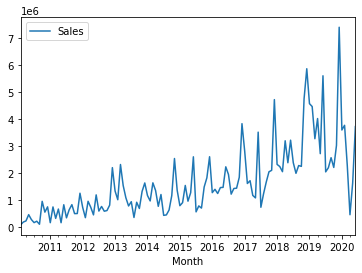

In [20]:
df.plot()

In [21]:

### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])

In [22]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [23]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.2866342236901627
p-value : 0.6352647732544168
#Lags Used : 13
Number of Observations Used : 111
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [24]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [25]:
df['Sales'].shift(1)

Month
2020-06-01          NaN
2020-05-01    3726445.0
2020-04-01    1637392.0
2020-03-01     462526.0
2020-02-01    2288558.0
                ...    
2010-06-01     170000.0
2010-05-01     284000.0
2010-04-01     465000.0
2010-03-01     232500.0
2010-02-01     190000.0
Name: Sales, Length: 125, dtype: float64

In [26]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [27]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
2020-06-01,3726445,NaN,NaN
2020-05-01,1637392,-2089053.0,NaN
2020-04-01,462526,-1174866.0,NaN
2020-03-01,2288558,1826032.0,NaN
2020-02-01,3774500,1485942.0,NaN
2020-01-01,3600616,-173884.0,NaN
2019-12-01,7405862,3805246.0,NaN
2019-11-01,3030040,-4375822.0,NaN
2019-10-01,2213500,-816540.0,NaN


In [29]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.9638584761469207
p-value : 0.0016120425045130676
#Lags Used : 11
Number of Observations Used : 101
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


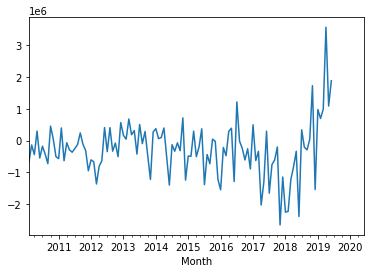

In [30]:
df['Seasonal First Difference'].plot()

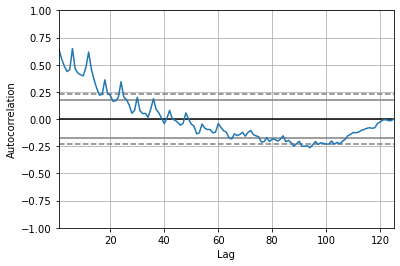

In [32]:
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

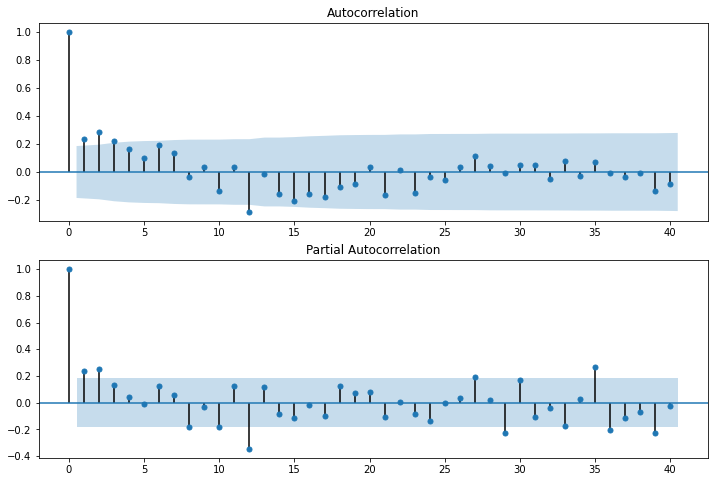

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [36]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  124
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1873.975
Method:                       css-mle   S.D. of innovations         870441.969
Date:                Sun, 05 Jul 2020   AIC                           3755.951
Time:                        22:16:27   BIC                           3767.232
Sample:                             1   HQIC                          3760.533
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.612e+04   3008.386     -8.681      0.000    -3.2e+04   -2.02e+04
ar.L1.D.Sales     0.2898      0.086      3.351      0.001       0.120       0.459
ma.L1.D.Sales    -0.9998      0.042    -23.878      0.000      -1.082      -0.918
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.4508           +0.0000j            3.4508            0.0000
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

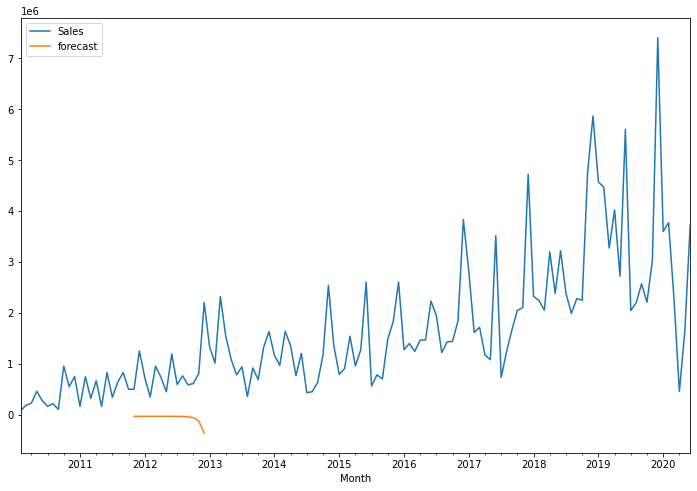

In [38]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [39]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


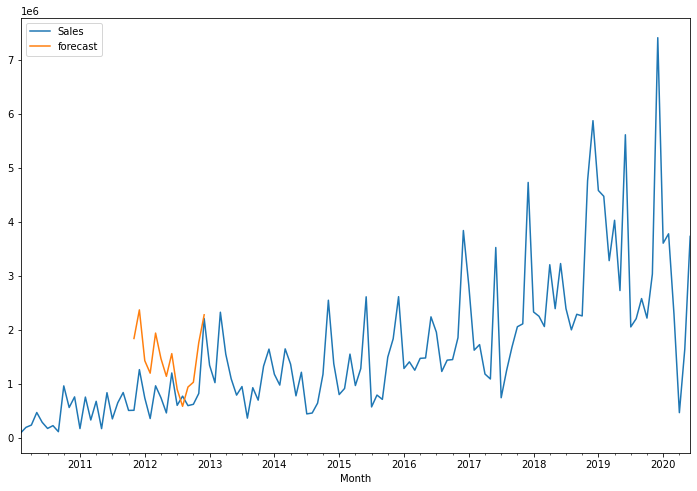

In [40]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [41]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
2011-09-01,NaN,NaN,NaN,NaN
2011-10-01,NaN,NaN,NaN,NaN
2011-11-01,NaN,NaN,NaN,NaN
2011-12-01,NaN,NaN,NaN,NaN
2012-01-01,NaN,NaN,NaN,NaN


In [42]:
future_df=pd.concat([df,future_datest_df])

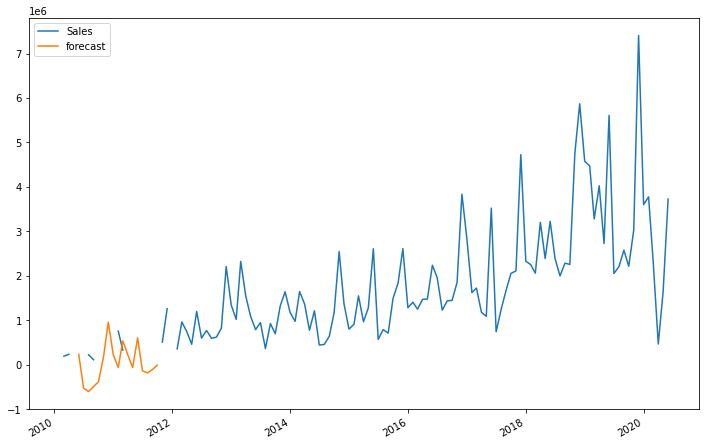

In [43]:

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))